__1. Project Information__

DEVP Project 1

Student Name(s)- Ashwin Khandelwal, Harsh Jain

Enrollment Number(s)- 055008,055018

Group Number-26

__2. Description of Data__


In [484]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency, chisquare
from scipy.stats import mannwhitneyu, wilcoxon, kruskal, friedmanchisquare
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from statsmodels.tsa.seasonal import seasonal_decompose

In [485]:
#Data Source & Size

In [486]:
dataset=pd.read_csv("C:\\Users\\Anuj\\DEVP\\Imports_Exports_Dataset.csv")

In [487]:
dataset.size

240000

In [488]:
sample=dataset.sample(n=2001, random_state=26)
#sample

In [489]:
#Data Dimension: Number of Variables | Number of Observations

In [490]:
sample.shape

(2001, 16)

In [491]:
sample.columns

Index(['Transaction_ID', 'Country', 'Product', 'Import_Export', 'Quantity',
       'Value', 'Date', 'Category', 'Port', 'Customs_Code', 'Weight',
       'Shipping_Method', 'Supplier', 'Customer', 'Invoice_Number',
       'Payment_Terms'],
      dtype='object')

In [493]:
#Data Type: Cross-sectional | Time-series | Panel
print('The Data Type is Panel')

The Data Type is Panel


In [494]:
#Data Variable Type: Text | Number {Integer | Decimal}

In [495]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2001 entries, 5044 to 9864
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   2001 non-null   object 
 1   Country          2001 non-null   object 
 2   Product          2001 non-null   object 
 3   Import_Export    2001 non-null   object 
 4   Quantity         2001 non-null   int64  
 5   Value            2001 non-null   float64
 6   Date             2001 non-null   object 
 7   Category         2001 non-null   object 
 8   Port             2001 non-null   object 
 9   Customs_Code     2001 non-null   int64  
 10  Weight           2001 non-null   float64
 11  Shipping_Method  2001 non-null   object 
 12  Supplier         2001 non-null   object 
 13  Customer         2001 non-null   object 
 14  Invoice_Number   2001 non-null   int64  
 15  Payment_Terms    2001 non-null   object 
dtypes: float64(2), int64(3), object(11)
memory usage: 265.8+ KB


In [496]:
#Data Variable Category: Index | Categorical {Nominal | Ordinal} | Non-Categorical

In [726]:
print("Data Variable Categories:",
      "\nIndex: Transaction_ID, Invoice_Number",
      "\nCategorical Ordinal:",
      "\nCategorical Nominal: Country, Product, Import_Export, Category, Customs_Code, Shipping_Method, Supplier, Customer, Payment_Terms",
      "\nNon-Categorical: Quantity, Value, Weight, Date ")

Data Variable Categories: 
Index: Transaction_ID, Invoice_Number 
Categorical Ordinal: 
Categorical Nominal: Country, Product, Import_Export, Category, Customs_Code, Shipping_Method, Supplier, Customer, Payment_Terms 
Non-Categorical: Quantity, Value, Weight, Date 


_Filtering out Non Categorical Data_

In [499]:
ncat=dataset[['Quantity', 'Value', 'Weight']]

In [500]:
#Creating sample of non categorical data
ncat_s=ncat.sample(n=2001, random_state=26)

__3. Problem Statements__

In [502]:
# ques1 -What is the variance in transaction value across different countries?

In [503]:
variance_value_by_country = sample.groupby('Country')['Value'].var().sort_values(ascending=False).head(5)
variance_value_by_country

Country
Western Sahara         2.351192e+07
Trinidad and Tobago    2.092766e+07
Eritrea                1.911218e+07
Barbados               1.909935e+07
Andorra                1.895977e+07
Name: Value, dtype: float64

In [504]:
# ques 2 - Are larger quantities associated with higher transaction values? (Correlation Coefficient and Scatter Plot

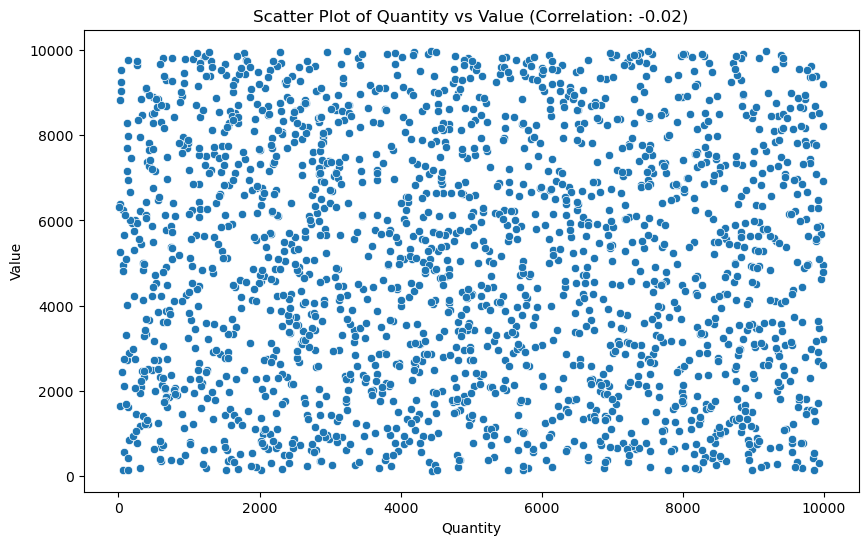

-0.022776199090946726

In [505]:
# Correlation between Quantity and Value
quantity_value_corr = sample[['Quantity', 'Value']].corr().iloc[0, 1]

# Scatter Plot to visualize
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Value', data=sample)
plt.title(f'Scatter Plot of Quantity vs Value (Correlation: {quantity_value_corr:.2f})')
plt.xlabel('Quantity')
plt.ylabel('Value')
plt.show()

quantity_value_corr


In [506]:
# ques 3 -Which ports handle the highest total trade value? (Top 5 ports)

In [507]:
top_ports = sample.groupby('Port')['Value'].sum().sort_values(ascending=False).head(5)
top_ports

Port
New Robert       27613.99
South Michael    27591.16
Martinezstad     25220.77
Johnsonmouth     23944.84
Port Mary        22716.87
Name: Value, dtype: float64

In [527]:
#ques 5- What is the trend in the number of transactions over time? (Time Series Plot of transaction count)

C:\Users\Anuj\AppData\Local\Temp\ipykernel_7500\1496298750.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  sample['Date'] = pd.to_datetime(sample['Date'], errors='coerce')


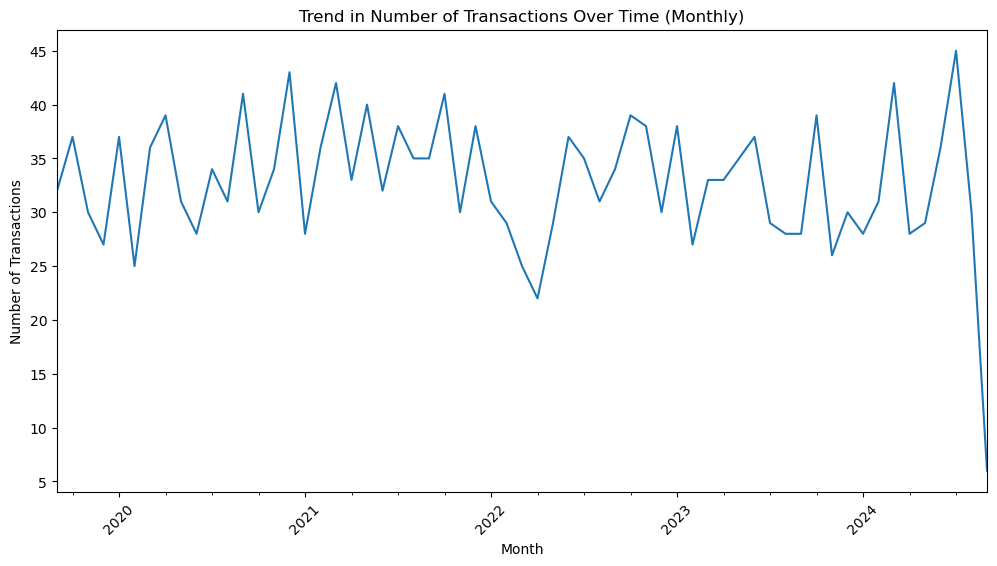

In [528]:
# Convert 'Date' to datetime if not already done
sample['Date'] = pd.to_datetime(sample['Date'], errors='coerce')

# Count the number of transactions over time
transactions_over_time = sample.groupby(sample['Date'].dt.to_period('M'))['Transaction_ID'].count()

# Plotting the trend
plt.figure(figsize=(12, 6))
transactions_over_time.plot()
plt.title('Trend in Number of Transactions Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


In [529]:
#ques 6- Which customers have the highest average transaction value?

In [530]:
top_customers = sample.groupby('Customer')['Value'].mean().sort_values(ascending=False).head(5)
top_customers


Customer
Robert Payne         9988.26
Colleen Park         9978.68
John Morgan          9975.87
Mario Gonzales       9975.84
Jennifer Hamilton    9968.50
Name: Value, dtype: float64

In [531]:
#ques 8-What are the top 5 most frequent products traded?

In [532]:
top_frequent_products = sample['Product'].value_counts().head(5)
top_frequent_products


Product
sometimes    7
physical     7
how          7
social       7
represent    7
Name: count, dtype: int64

In [533]:
#ques 9-How does the weight of goods vary between different categories? (Box Plot)

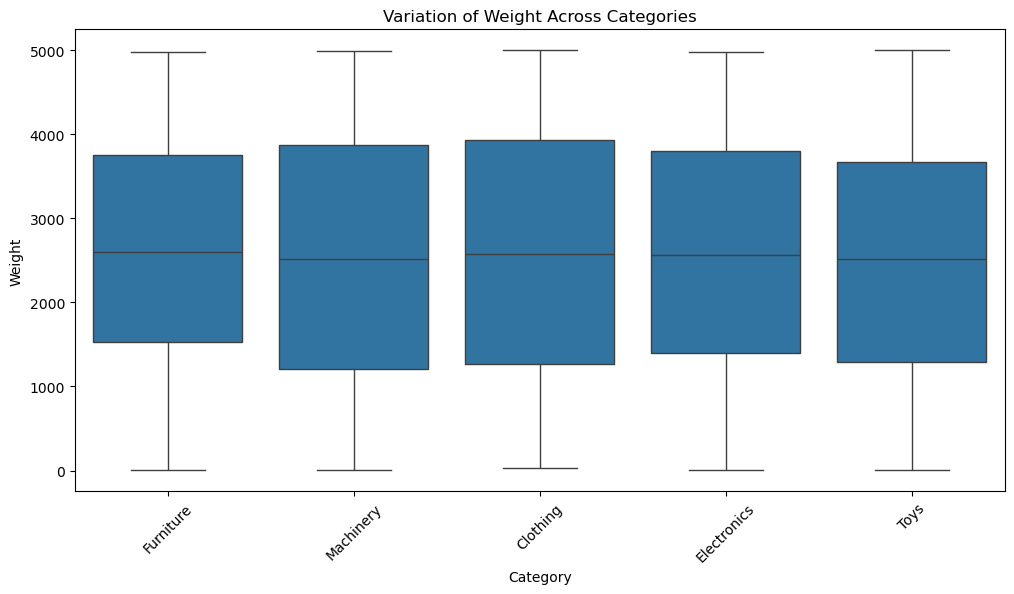

In [534]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Weight', data=sample)
plt.title('Variation of Weight Across Categories')
plt.xticks(rotation=45)
plt.show()


In [535]:
#ques 10-What is the average time difference between transactions? (Calculate time difference between consecutive transactions)

In [722]:
# Ensure the 'Date' column is in datetime format
data = sample.sort_values('Date')

# Calculate the time difference between consecutive transactions
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Time_Diff'] = data['Date'].diff().dt.days

# Get the average time difference
avg_time_diff = data['Time_Diff'].mean()
avg_time_diff


0.9125

In [537]:
#ques 11 -How does transaction value vary by supplier? (Box Plot of Value by Supplier)

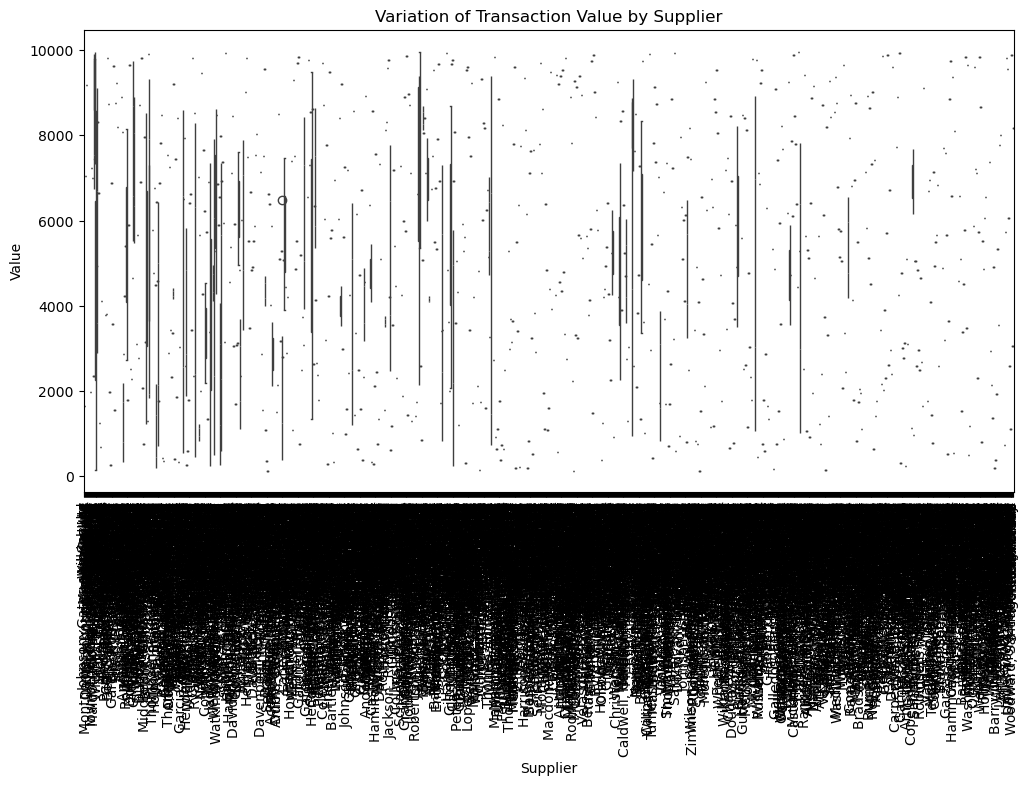

In [538]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Supplier', y='Value', data=sample)
plt.title('Variation of Transaction Value by Supplier')
plt.xticks(rotation=90)
plt.show()


In [539]:
#ques 12 -Which products have the highest average weight?

In [540]:
highest_avg_weight_products = sample.groupby('Product')['Weight'].mean().sort_values(ascending=False).head(5)
highest_avg_weight_products


Product
suffer    4949.410
right     4915.590
sell      4913.730
policy    4912.260
owner     4898.045
Name: Weight, dtype: float64

In [541]:
#ques 13 - How does the total value of goods vary between different product categories?

In [542]:
category_value_totals = sample.groupby('Category')['Value'].sum().sort_values(ascending=False).head(5)
category_value_totals


Category
Electronics    2117632.44
Clothing       2030893.72
Machinery      1986106.08
Furniture      1984805.93
Toys           1925368.42
Name: Value, dtype: float64

In [543]:
#ques 14 -What are the most common payment terms used in the dataset? (Count of different Payment_Terms)

In [544]:
payment_terms_count = sample['Payment_Terms'].value_counts()
payment_terms_count


Payment_Terms
Net 60              534
Net 30              503
Cash on Delivery    489
Prepaid             475
Name: count, dtype: int64

In [545]:
#ques 15 -What is the total quantity of goods traded per country?

In [546]:
total_quantity_by_country = sample.groupby('Country')['Quantity'].sum().sort_values(ascending=False)
total_quantity_by_country


Country
Congo                          114158
Korea                           91147
Costa Rica                      88826
Guinea                          81581
Mexico                          78437
                                ...  
Isle of Man                     12151
Trinidad and Tobago             10822
Falkland Islands (Malvinas)      9882
Croatia                          9185
Comoros                           790
Name: Quantity, Length: 243, dtype: int64

In [547]:
#ques 16 -What is the relationship between transaction value and weight for different shipping methods? (Scatter Plot)

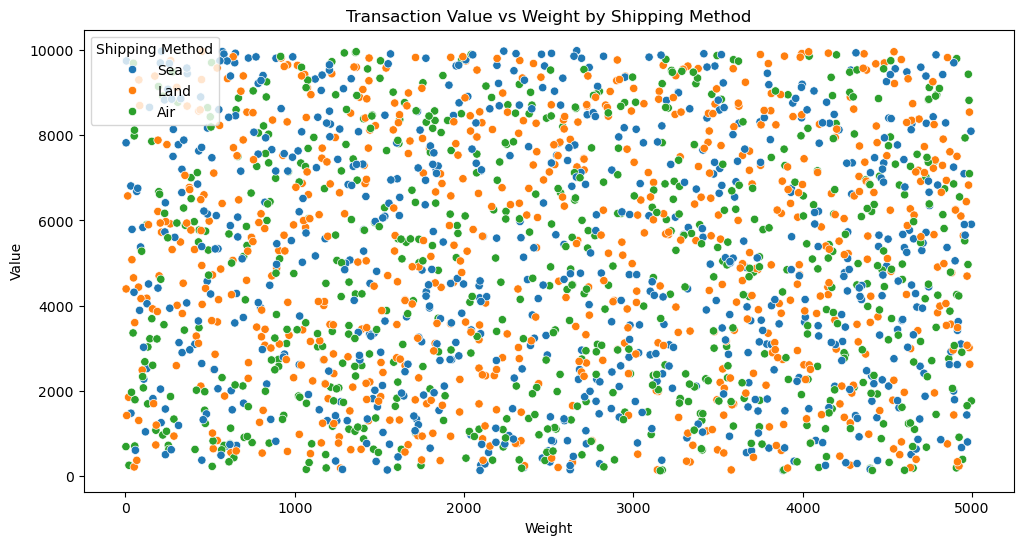

In [548]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Weight', y='Value', hue='Shipping_Method', data=sample)
plt.title('Transaction Value vs Weight by Shipping Method')
plt.xlabel('Weight')
plt.ylabel('Value')
plt.legend(title='Shipping Method')
plt.show()


In [549]:
#ques 17 -Which country has the most diverse product trade? (Based on the number of unique products traded per country)

In [550]:
diverse_product_trade = sample.groupby('Country')['Product'].nunique().sort_values(ascending=False).head(5)
diverse_product_trade

Country
Congo                    21
Palestinian Territory    18
Korea                    18
Costa Rica               16
Guinea                   15
Name: Product, dtype: int64

In [551]:
#ques 18 -What is the skewness and kurtosis of the transaction values? (Skewness and Kurtosis)

In [552]:
skewness_value = skew(sample['Value'])
kurtosis_value = kurtosis(sample['Value'])

skewness_value, kurtosis_value


(0.021605122931152503, -1.2189291945997685)

In [553]:
#ques 19 -Are there any outliers in the transaction values? (Box Plot to detect outliers in Value)

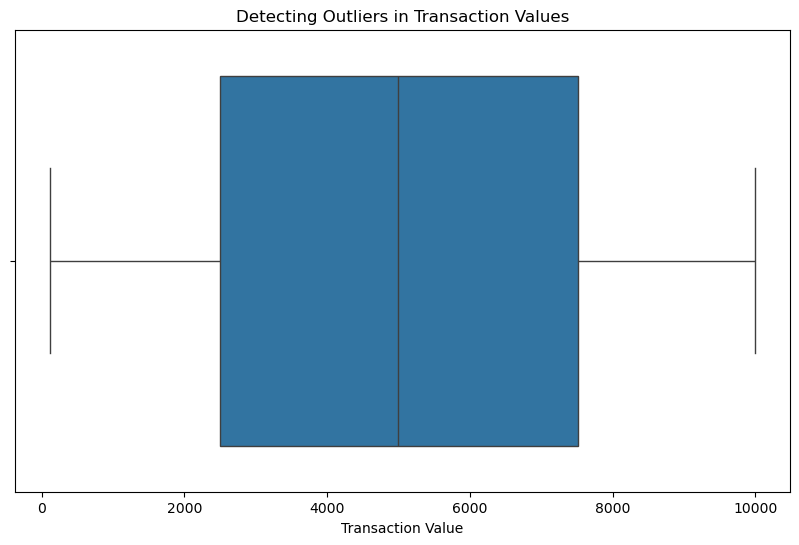

In [554]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Value', data=sample)
plt.title('Detecting Outliers in Transaction Values')
plt.xlabel('Transaction Value')
plt.show()


In [555]:
#ques 21 -Which shipping method is associated with the highest transaction values?

In [556]:
shipping_method_value = sample.groupby('Shipping_Method')['Value'].mean().sort_values(ascending=False)
shipping_method_value


Shipping_Method
Land    5212.046381
Sea     5050.344651
Air     4781.307391
Name: Value, dtype: float64

In [557]:
#ques 22 -What is the relationship between quantity and value by product category? (Scatter Plot with Categories)

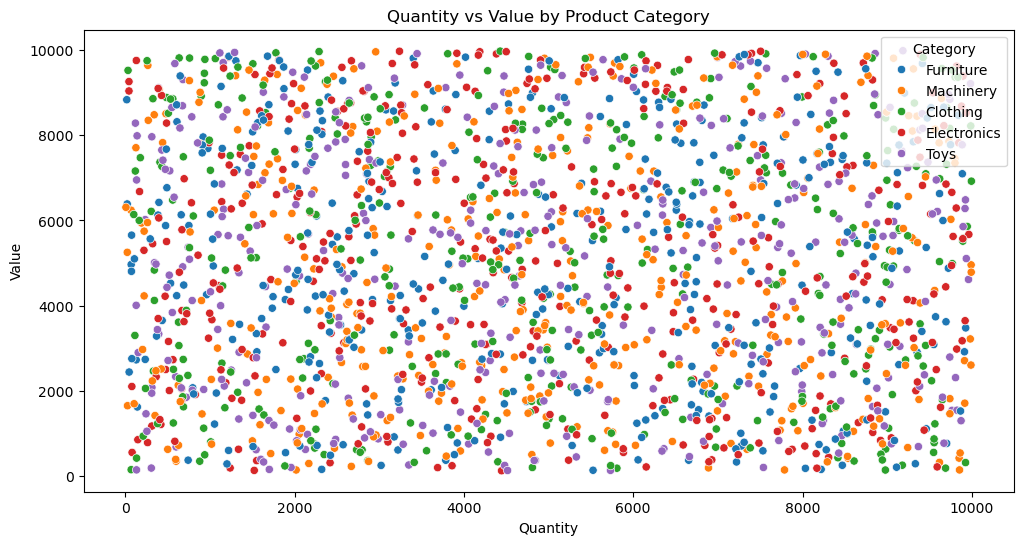

In [558]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Quantity', y='Value', hue='Category', data=sample)
plt.title('Quantity vs Value by Product Category')
plt.xlabel('Quantity')
plt.ylabel('Value')
plt.legend(title='Category')
plt.show()


In [559]:
#ques 23 -Which supplier has the most transactions?

In [560]:
most_transactions_supplier = sample['Supplier'].value_counts().head(1)
most_transactions_supplier


Supplier
Smith PLC    4
Name: count, dtype: int64

In [561]:
#ques 24 -What is the mode of the transaction values?

In [562]:
mode_value = sample['Value'].mode()[0]
mode_value


1058.42

In [563]:
#ques 25 -Is there a trend in the average transaction value over time? (Time Series Plot)

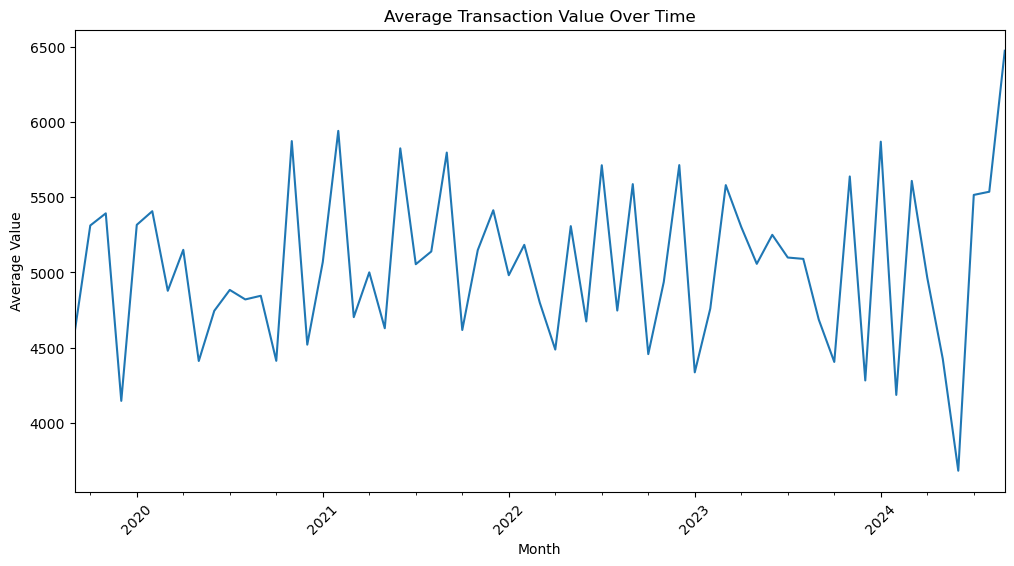

In [564]:
# Ensure 'Date' is in datetime format
sample['Date'] = pd.to_datetime(sample['Date'], errors='coerce')

# Group by month and calculate average value
avg_value_over_time = sample.groupby(sample['Date'].dt.to_period('M'))['Value'].mean()

# Plotting
plt.figure(figsize=(12, 6))
avg_value_over_time.plot()
plt.title('Average Transaction Value Over Time')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.show()


In [565]:
#ques 26 -Which country has the highest total weight of goods traded?

In [566]:
highest_total_weight_country = sample.groupby('Country')['Weight'].sum().sort_values(ascending=False).head(1)
highest_total_weight_country


Country
Korea    57215.01
Name: Weight, dtype: float64

In [567]:
#ques 27 -What is the standard deviation of transaction values for each product category?

In [568]:
std_value_by_category = sample.groupby('Category')['Value'].std().sort_values(ascending=False)
std_value_by_category


Category
Clothing       3017.492271
Electronics    2919.232949
Toys           2860.892548
Machinery      2859.393434
Furniture      2789.063175
Name: Value, dtype: float64

In [569]:
#ques 28 -Which shipping method is the most frequently used for exports versus imports? (Count of Shipping_Method by Import_Export)

In [570]:
shipping_method_usage = pd.crosstab(sample['Shipping_Method'], sample['Import_Export'])
shipping_method_usage


Import_Export,Export,Import
Shipping_Method,,
Air,296,344
Land,320,368
Sea,340,333


In [571]:
#ques 50 - Which country has the highest average weight per transaction?

In [572]:
avg_weight_by_country = data.groupby('Country')['Weight'].mean().sort_values(ascending=False).head(1)
avg_weight_by_country

Country
Puerto Rico    3833.581667
Name: Weight, dtype: float64

In [573]:
#ques 51 -How do payment terms impact the value of transactions? (Box Plot of Value by Payment_Terms)

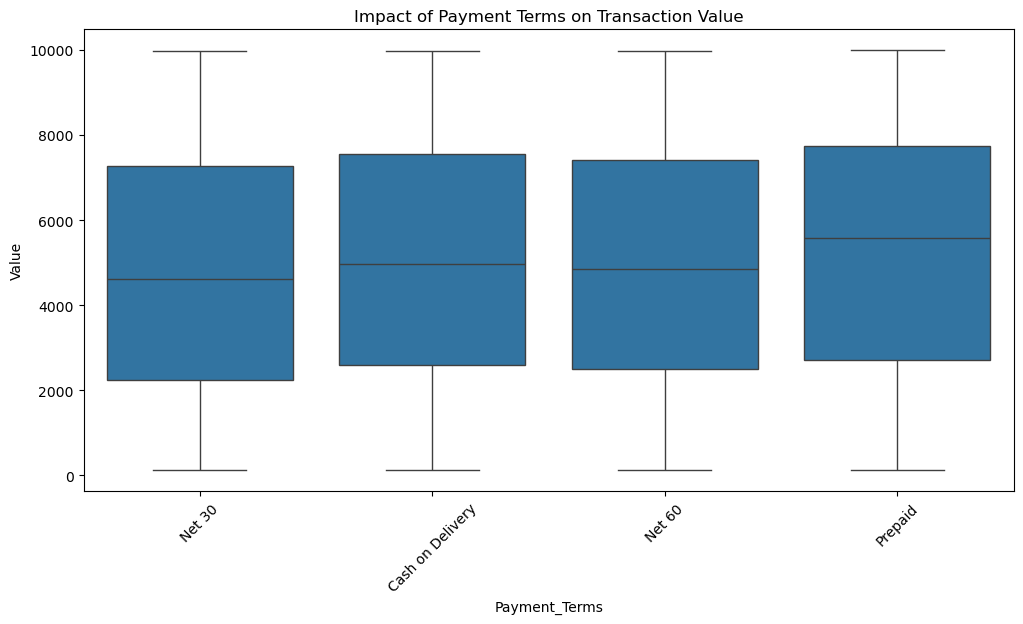

In [574]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Payment_Terms', y='Value', data=sample)
plt.title('Impact of Payment Terms on Transaction Value')
plt.xticks(rotation=45)
plt.show()


In [575]:
#ques 52 -Which category has the largest variance in transaction value?

In [576]:
variance_value_by_category = sample.groupby('Category')['Value'].var().sort_values(ascending=False).head(1)
variance_value_by_category


Category
Clothing    9.105260e+06
Name: Value, dtype: float64

In [577]:
#ques 53 -What is the proportion of exports to imports for each product

In [578]:
proportion_export_import = pd.crosstab(sample['Product'], sample['Import_Export'], normalize='index')
proportion_export_import


Import_Export,Export,Import
Product,,
Congress,0.500000,0.500000
Democrat,1.000000,0.000000
I,1.000000,0.000000
Mr,1.000000,0.000000
Mrs,0.000000,1.000000
...,...,...
yes,0.333333,0.666667
yet,1.000000,0.000000
you,1.000000,0.000000


In [579]:
#ques 54 -What is the median weight of goods traded per shipping method?

In [580]:
median_weight_by_shipping_method = sample.groupby('Shipping_Method')['Weight'].median()
median_weight_by_shipping_method


Shipping_Method
Air     2561.72
Land    2533.77
Sea     2547.70
Name: Weight, dtype: float64

In [581]:
#ques 55 -Which products are most frequently associated with high-value transactions?

In [582]:
high_value_threshold = sample['Value'].quantile(0.90)  # Top 10% of transactions by value
high_value_products = sample[sample['Value'] > high_value_threshold]['Product'].value_counts().head(5)
high_value_products


Product
of            3
shake         3
speak         2
understand    2
own           2
Name: count, dtype: int64

__4. Analysis of Data__

Non Categorical Data Tests

In [585]:
#Measures of Central Tendency

# Minimum and Maximum
min_values = ncat_s.min()
max_values = ncat_s.max()

# Mean and Median
mean_values = ncat_s.mean()
median_values = ncat_s.median()

# Mode
mode_values = ncat_s.mode()

# Percentile (for example, 25th, 50th, 75th)
percentiles = ncat_s.quantile([0.25, 0.5, 0.75])

print("Min:") 
print(min_values)
print("\nMax:") 
print(max_values)
print("\nMean:") 
print(mean_values)
print("\nMedian:") 
print(median_values)
print("\nMode:") 
print(mode_values)
print("\nPercentiles:\n") 
print(percentiles)

Min:
Quantity      6.00
Value       119.46
Weight        2.80
dtype: float64

Max:
Quantity    9995.00
Value       9988.26
Weight      4997.24
dtype: float64

Mean:
Quantity    4933.594703
Value       5019.893348
Weight      2541.922679
dtype: float64

Median:
Quantity    4854.00
Value       4991.94
Weight      2550.26
dtype: float64

Mode:
   Quantity    Value   Weight
0    4255.0  1058.42   959.06
1       NaN  1226.76  2908.38
2       NaN  7941.74  3738.94

Percentiles:

      Quantity    Value   Weight
0.25    2432.0  2497.44  1318.73
0.50    4854.0  4991.94  2550.26
0.75    7455.0  7520.86  3801.19


In [587]:
#Finding Measures of Dispersion

# Range (Max - Min)
range_values = ncat_s.max() - ncat_s.min()

# Standard Deviation
std_dev = ncat_s.std()

# Skewness (measure of asymmetry)
skewness = ncat_s.skew()

# Kurtosis (measure of tails/heaviness)
kurtosis = ncat_s.kurt()

# Correlation matrix (Pearson correlation by default)
correlation_matrix = ncat_s.corr()

print("Range:") 
print(range_values)
print("\nStandard Deviation:") 
print(std_dev)
print("\nSkewness:") 
print(skewness)
print("\nKurtosis:")
print(kurtosis)
print("\nCorrelation:") 
print(correlation_matrix)

Range:
Quantity    9989.00
Value       9868.80
Weight      4994.44
dtype: float64

Standard Deviation:
Quantity    2892.740370
Value       2890.963884
Weight      1444.621333
dtype: float64

Skewness:
Quantity    0.046704
Value       0.021621
Weight     -0.014862
dtype: float64

Kurtosis:
Quantity   -1.201813
Value      -1.218976
Weight     -1.210528
dtype: float64

Correlation:
          Quantity     Value    Weight
Quantity  1.000000 -0.022776  0.010177
Value    -0.022776  1.000000 -0.000535
Weight    0.010177 -0.000535  1.000000


In [588]:
#Composite Measure

# Coefficient of Variation (CV = std_dev / mean)
cv = std_dev / mean_values

# Confidence Interval (assuming a 95% confidence interval)
conf_interval = {}
for column in ncat_s.columns:
    mean = ncat_s[column].mean()
    sem = stats.sem(ncat_s[column])  # Standard error of the mean
    conf_interval[column] = stats.t.interval(0.95, len(ncat_s[column]) - 1, loc=mean, scale=sem)

print("Coefficient of Variation:")
print(cv)
print("\nConfidence Interval:")
print(conf_interval)

Coefficient of Variation:
Quantity    0.586335
Value       0.575901
Weight      0.568318
dtype: float64

Confidence Interval:
{'Quantity': (4806.772028189993, 5060.417377107358), 'Value': (4893.148558057655, 5146.638138594019), 'Weight': (2478.588014076357, 2605.2573432449813)}


In [589]:
#Test of Mean

# t-test (Comparing column Weight with a population mean of 5)
t_stat, p_val = stats.ttest_1samp(ncat_s['Weight'], 50)

# ANOVA (Comparing multiple groups)
f_stat, p_val_anova = stats.f_oneway(ncat_s['Weight'], ncat_s['Value'])

print("t-test p-value:")
print(p_val)

print("\nANOVA p-value:")
print(p_val_anova)

t-test p-value:
0.0

ANOVA p-value:
3.0903435367195952e-226


In [590]:
#Test of Variance

# F-test (between columns A and B)
f_stat, p_val_f = stats.levene(ncat_s['Quantity'], ncat_s['Weight'])

# Levene's test (for equal variances)
levene_stat, levene_p = stats.levene(ncat_s['Quantity'], ncat_s['Value'])

# Bartlett’s test (for equal variances)
bartlett_stat, bartlett_p = stats.bartlett(ncat_s['Quantity'], ncat_s['Value'])

print("F-test p-value:")
print(p_val_f)
print("\nLevene test p-value:")
print(levene_p)
print("\nBartlett test p-value:")
bartlett_p

F-test p-value:
1.2377441030167025e-226

Levene test p-value:
0.8142344954397669

Bartlett test p-value:


0.9780854810958154

In [591]:
#Test of Proportion

#Example: 10 successes out of 50 trials
successes = 10
n = 50
p0 = 0.5  # Hypothesized population proportion
z_stat, p_val_z = proportions_ztest(successes, n, value=p0)

# Chi-square test (for independence)
chi2_stat, p_val_chi2, _, _ = stats.chi2_contingency(pd.crosstab(ncat_s['Quantity'], ncat_s['Value']))

print("z-test p-value:", p_val_z)
print("\nChi-square p-value:\n") 
print(p_val_chi2)

z-test p-value: 1.1372725656979709e-07

Chi-square p-value:

0.3192588525281362


In [592]:
# Testing correlation significance
r, p_val_corr = stats.pearsonr(ncat_s['Value'], ncat_s['Quantity'])

print("Correlation p-value:", p_val_corr)

Correlation p-value: 0.30851989406862235


In [593]:
# Shapiro-Wilk Test
shapiro_stat, p_val_shapiro = stats.shapiro(ncat_s['Quantity'])

# Kolmogorov-Smirnov Test
ks_stat, p_val_ks = stats.kstest(ncat_s['Weight'], 'norm', args=(ncat_s['Quantity'].mean(), ncat_s['Value'].std()))

# Anderson-Darling Test
anderson_stat = stats.anderson(ncat_s['Quantity'], dist='norm')

# Jarque-Bera Test
jb_stat, p_val_jb = stats.jarque_bera(ncat_s['Value'])

print("Shapiro-Wilk p-value:", p_val_shapiro)
print("\nKolmogorov-Smirnov p-value:", p_val_ks)
print("\nAnderson-Darling statistic:", anderson_stat)
print("\nJarque-Bera p-value:", p_val_jb)

Shapiro-Wilk p-value: 1.3589583528261564e-24

Kolmogorov-Smirnov p-value: 0.0

Anderson-Darling statistic: AndersonResult(statistic=22.914320701452652, critical_values=array([0.575, 0.655, 0.785, 0.916, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=4933.594702648676, scale=2892.74037033259)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

Jarque-Bera p-value: 1.1655097807118446e-27


In [594]:
# Mann-Whitney U Test
mannwhitney_stat, p_val_mw = stats.mannwhitneyu(ncat_s['Value'], ncat_s['Quantity'])

# Wilcoxon Signed-Rank Test
wilcoxon_stat, p_val_wilcoxon = stats.wilcoxon(ncat_s['Weight'] - ncat_s['Quantity'])

# Kruskal-Wallis Test (ANOVA alternative)
kruskal_stat, p_val_kruskal = stats.kruskal(ncat_s['Value'], ncat_s['Weight'])

# Friedman Test (for repeated measures)
friedman_stat, p_val_friedman = stats.friedmanchisquare(ncat_s['Value'], ncat_s['Weight'], ncat_s['Value'] + ncat_s['Weight'])

print("Mann-Whitney p-value:", p_val_mw)
print("Wilcoxon p-value:", p_val_wilcoxon)
print("Kruskal-Wallis p-value:", p_val_kruskal)
print("Friedman p-value:", p_val_friedman)


Mann-Whitney p-value: 0.34381046514559954
Wilcoxon p-value: 3.910031323999439e-157
Kruskal-Wallis p-value: 7.221196691289278e-161
Friedman p-value: 0.0


In [595]:
#Regression Analysis

# Linear Regression
X = ncat_s[['Weight']]  # Independent variable(s)
y = ncat_s['Value']    # Dependent variable

# Fitting the model
linear_model = LinearRegression().fit(X, y)

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression().fit(X_poly, y)

print("Linear Model Coefficients:", linear_model.coef_)
print("Polynomial Model Coefficients:", poly_model.coef_)


Linear Model Coefficients: [-0.00107074]
Polynomial Model Coefficients: [ 0.00000000e+00  7.64473141e-02 -1.53125201e-05]


Categorical Data Tests

In [597]:
cat=dataset[['Country', 'Product', 'Import_Export', 'Category', 'Customs_Code', 'Shipping_Method', 'Supplier', 'Customer', 'Payment_Terms']]
cat_s=cat.sample(n=2001, random_state=26)
cat_s.head()

,Country,Product,Import_Export,Category,Customs_Code,Shipping_Method,Supplier,Customer,Payment_Terms
5044,Ghana,paper,Export,Furniture,625001,Sea,Mueller-Collins,Donald Roberson,Net 30
3090,Ireland,night,Import,Machinery,679106,Land,Wilkins Ltd,Jill Jordan,Cash on Delivery
229,Antarctica (the territory South of 60 deg S),into,Import,Machinery,700457,Air,"Johnson, Gates and Schultz",Dana Jackson,Cash on Delivery
6428,Isle of Man,for,Export,Clothing,427479,Air,Hurley Inc,Michael Love,Net 60
13699,Mongolia,pick,Import,Clothing,856476,Sea,Gibbs-Campos,Dawn Rowland,Net 30


In [598]:
# Count and Frequency
category_counts = cat_s['Category'].value_counts()
category_frequencies = cat_s['Shipping_Method'].value_counts(normalize=True)  # Proportion

print("Category Counts:\n", category_counts)
print("\nCategory Proportion (Frequency):\n", category_frequencies)


Category Counts:
 Category
Machinery      416
Electronics    410
Furniture      396
Clothing       392
Toys           387
Name: count, dtype: int64

Category Proportion (Frequency):
 Shipping_Method
Land    0.343828
Sea     0.336332
Air     0.319840
Name: proportion, dtype: float64


In [599]:
# Minimum and Maximum of Value column
min_value = cat_s['Customs_Code'].min()
max_value = cat_s['Customs_Code'].max()
mode_category = cat_s['Category'].mode()[0]  # Mode of Category column

print("Min Value:", min_value)
print("Max Value:", max_value)
print("Mode of Category:", mode_category)


Min Value: 100171
Max Value: 999953
Mode of Category: Machinery


In [600]:
cat_s['Rank'] = cat_s['Country'].rank(method='min')  # Ranking by Value

print("Ranked Data:\n") 
cat_s


Ranked Data:



,Country,Product,Import_Export,Category,Customs_Code,Shipping_Method,Supplier,Customer,Payment_Terms,Rank
5044,Ghana,paper,Export,Furniture,625001,Sea,Mueller-Collins,Donald Roberson,Net 30,670.0
3090,Ireland,night,Import,Machinery,679106,Land,Wilkins Ltd,Jill Jordan,Cash on Delivery,853.0
229,Antarctica (the territory South of 60 deg S),into,Import,Machinery,700457,Air,"Johnson, Gates and Schultz",Dana Jackson,Cash on Delivery,72.0
6428,Isle of Man,for,Export,Clothing,427479,Air,Hurley Inc,Michael Love,Net 60,861.0
13699,Mongolia,pick,Import,Clothing,856476,Sea,Gibbs-Campos,Dawn Rowland,Net 30,1197.0
...,...,...,...,...,...,...,...,...,...,...
661,Palestinian Territory,leave,Export,Furniture,358218,Land,Huerta-Blake,Emily Mendez,Cash on Delivery,1384.0
367,British Indian Ocean Territory (Chagos Archipe...,camera,Import,Furniture,933072,Land,"Woodward, Santiago and Johnson",Dr. Travis Bruce,Prepaid,256.0
5336,Pitcairn Islands,behind,Import,Clothing,583856,Air,Thomas-Gonzalez,Connie Johnston,Net 60,1440.0
9281,Papua New Guinea,stay,Import,Toys,357252,Sea,Flores and Sons,Troy Williams,Net 30,1407.0


In [602]:
# Test of Independence
contingency_table = pd.crosstab(cat_s['Category'], cat_s['Import_Export'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test of Independence: chi2={chi2}, p-value={p}")


Chi-Square Test of Independence: chi2=4.187987528373212, p-value=0.381161912288634


In [603]:
cat.sample(n=5)

,Country,Product,Import_Export,Category,Customs_Code,Shipping_Method,Supplier,Customer,Payment_Terms
11105,Latvia,when,Export,Clothing,230420,Sea,Garcia-Powers,Sarah Cox,Net 60
7059,French Polynesia,moment,Import,Toys,957017,Land,Irwin-Walsh,Robert Moore,Net 60
5813,Zimbabwe,important,Import,Clothing,734849,Air,"Vasquez, Bowen and Dawson",Ian Roach,Cash on Delivery
336,Denmark,sometimes,Export,Toys,488906,Land,Zhang and Sons,Aaron Hines,Net 60
11539,Western Sahara,law,Import,Clothing,232140,Sea,"Moses, Smith and Hunt",William Nguyen,Prepaid


In [605]:
# Kruskal-Wallis Test (for >2 independent groups)
group1 = cat_s[cat_s['Payment_Terms'] == 'Net 60']['Category']
group2 = cat_s[cat_s['Payment_Terms'] == 'Cash on Delivery']['Category']
group3 = cat_s[cat_s['Payment_Terms'] == 'Net 30']['Category']
stat, p = kruskal(group1, group2, group3)
print(f"Kruskal-Wallis Test: stat={stat}, p-value={p}")


Kruskal-Wallis Test: stat=1.5570256812285403, p-value=0.4590882412740246


__4. Findings__

In [607]:
#Weight and Quantity Management: Given the statistical significance found in 'Weight' and 'Quantity,' business should consider optimizing packaging, shipping methods, and inventory management to reduce variability and improve consistency.

In [608]:
#Country Western Sahara had the highest variance in terms of the value 

In [609]:
#Clothing category has the largest variance in transaction value

In [610]:
#Land shipping method is the most frequently used for exports versus imports

In [611]:
#Although, there is not a trend in the average transaction value over time, we are able to see that the flucatuating average transaction value has risen sharply very recently

In [612]:
#There is no clear relationship between quantity and value by product category

In [613]:
#There were not any outliers in the transaction values in the sample taken

In [614]:
#Larger quantities are not associated with higher transaction values as there no formation of clear trend in the scatter plot

In [615]:
#There is no clear trend/relationship between transaction value and weight for different shipping methods in the sample taken

In [616]:
#The proportion of exports to imports for each product remained 1:1 in the sample taken

__5. Managerial Recommendations__

In [619]:
#Process Standardization: The firm should implement standardized processes across all regions, particularly for areas showing significant variance, to maintain consistency and reliability.

In [620]:
#Supplier and Customer Collaboration: The firm should strengthen relationships with key suppliers and customers, focusing on those contributing to more stable and predictable metrics.